In [1]:
def dummy_function(x):
    return x+x

In [2]:
%%timeit
dummy_function(2)

48.6 ns ± 0.177 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [3]:
%%timeit
dummy_function(2)

49.2 ns ± 0.476 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [38]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score

In [5]:
df = pd.read_csv('Mall_Customers.csv')

In [6]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
usless = "CustomerID"
df = df.drop(usless	, axis=1)

In [8]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [9]:
numeric_features = []
categorical_features = []
for i,t in df.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) 
    ])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

df_norm = preprocessor.fit_transform(df)

C:\Users\jerem\AppData\Local\Temp\ipykernel_14840\3515894979.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i,t in df.dtypes.iteritems():


In [15]:
silhouette_scores = []
inertias = []
n_clusters = []

for n_cluster in range(2,11):
    km = KMeans(n_clusters=n_cluster)
    km.fit(df_norm)
    predictions = km.predict(df_norm)
    silhouette_scores.append(silhouette_score(df_norm, predictions))
    inertias.append(km.inertia_)
    n_clusters.append(n_cluster)

In [16]:
inertias

[438.52241155677746,
 344.405428869535,
 254.28290726083475,
 216.7849015165104,
 181.9514362434146,
 165.29517704559254,
 153.4616236262384,
 142.5818137711297,
 132.30582939746822]

In [17]:
silhouette_scores

[0.3031976564160757,
 0.3142800845203407,
 0.3502702043465398,
 0.34977050035201074,
 0.356485834425401,
 0.342550959923679,
 0.3274355213721424,
 0.31173510614956135,
 0.313980679179495]

In [52]:
temp = pd.DataFrame([n_clusters, silhouette_scores, inertias]).T.rename(columns={0:"clusters", 1:"silouhette", 2:"inertia"})

<AxesSubplot: xlabel='clusters'>

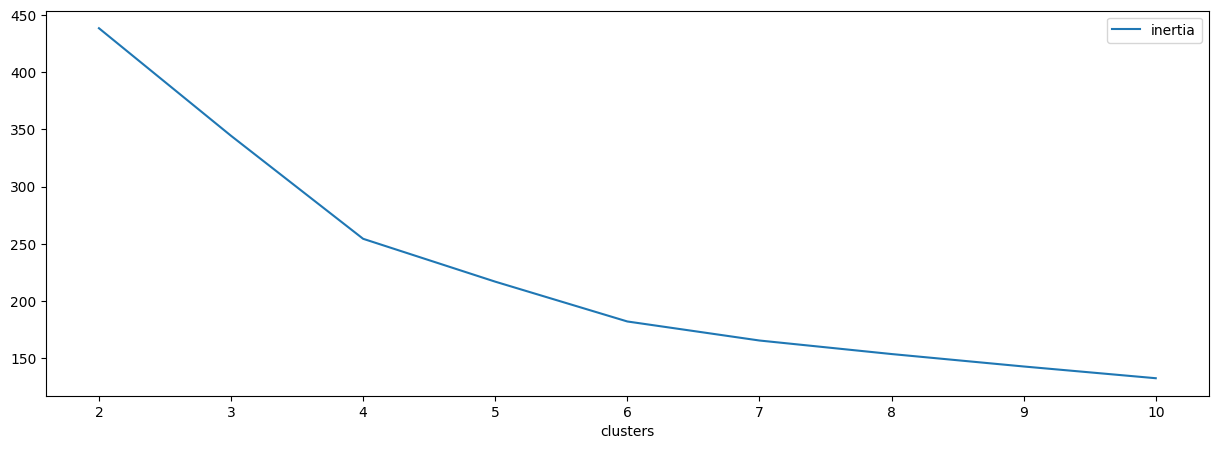

In [53]:
temp.set_index("clusters")["inertia"].plot(figsize=(15,5), legend=True)

<AxesSubplot: xlabel='clusters'>

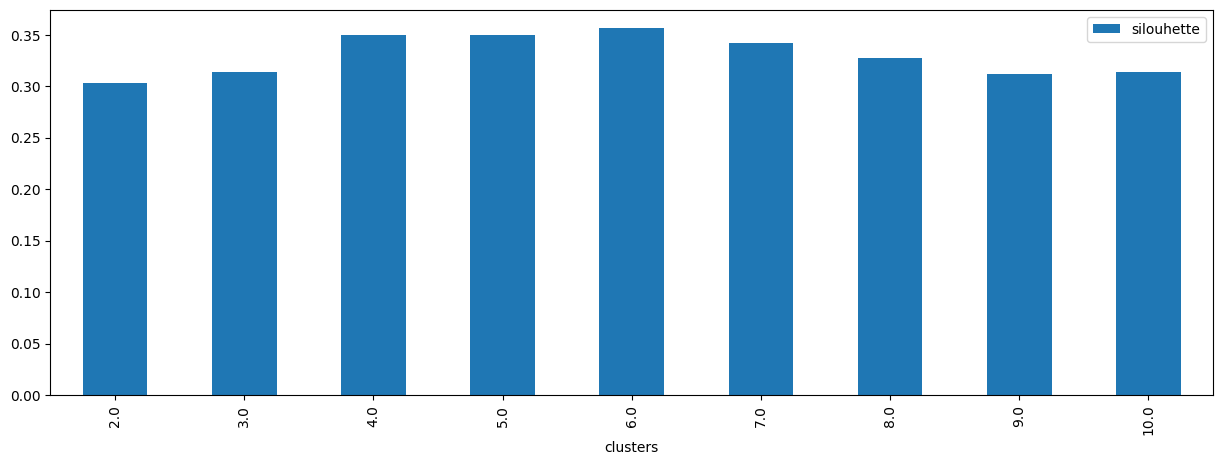

In [54]:
temp.set_index("clusters")["silouhette"].plot(kind='bar', figsize=(15,5), legend=True)

In [25]:
km = KMeans(n_clusters=6, random_state=0)
km.fit(df_norm)
K = km.predict(df_norm)
K

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 0,
       4, 2, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 5, 1, 5, 1, 5, 1,
       0, 1, 5, 1, 5, 1, 5, 1, 5, 1, 0, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 3, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1])

In [26]:
df["Cluster"] = K

In [27]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,5
197,Male,32,126,74,1
198,Male,32,137,18,5


In [35]:
px.scatter(df,  x="Annual Income (k$)", y="Spending Score (1-100)", color="Cluster", )

In [36]:
px.scatter(df,  x="Age", y="Spending Score (1-100)", color="Cluster")


In [51]:
px.scatter_3d(df, x='Age', y='Spending Score (1-100)', z='Annual Income (k$)', color="Cluster")

C:\Users\jerem\AppData\Local\Temp\ipykernel_14840\4251723241.py:3: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.



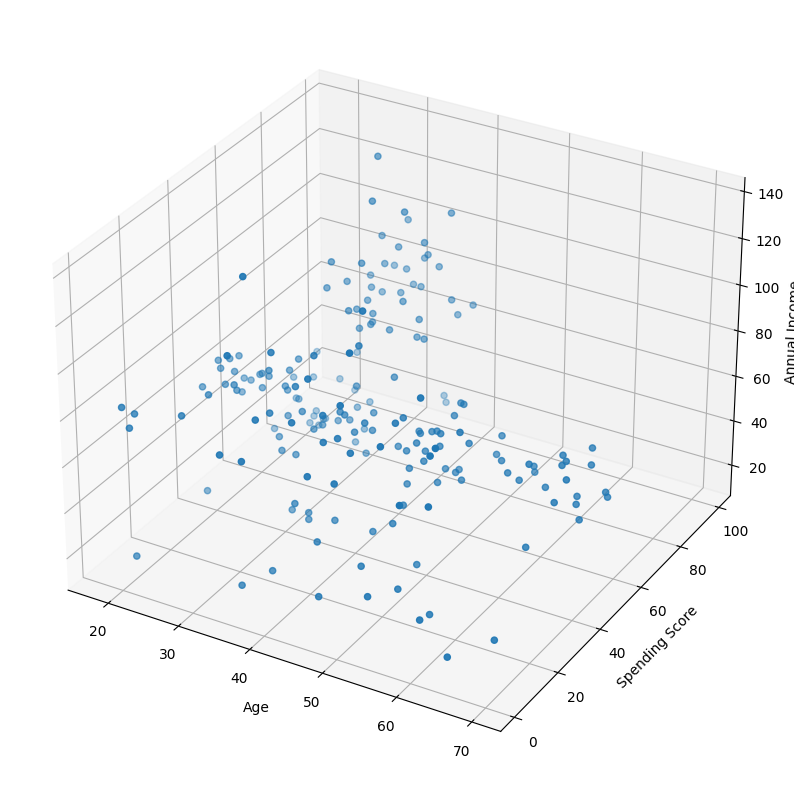

In [50]:
# fig = plt.figure(figsize=(15,10))
# ax = fig.add_subplot(projection='3d')
# ax.grid(b = True, color ='grey',
#         linestyle ='-.', linewidth = 0.3,
#         alpha = 0.2)
# ax.scatter(xs=df["Age"], ys=df["Spending Score (1-100)"], zs=df["Annual Income (k$)"],)
# ax.set_xlabel('Age')
# ax.set_ylabel('Spending Score')
# ax.set_zlabel('Annual Income')
# plt.show()